In [1]:
import os 
import pandas as pd
import numpy as np
import csv
year = 60*60*24*365
import matplotlib.pyplot as plt
import csv
from numpy import linalg as LA

In [2]:
module_directory = os.path.dirname(os.getcwd())
# define function to find all the files of a given extension in a directory and its subfolders, 
# and return the filename if check_print is True 
def findext(extension, path, check_print): 
    l = [] 
    for root, dirs, files in os.walk(path):
        for filename in files:
            if filename.endswith(extension):
                if not 'new' in filename and filename.rsplit('.')[0].rsplit('-')[1] == 'XV' :
                    l.append(os.path.join(root,filename))
                    if check_print == True : 
                        print(os.path.splitext(filename)[0])
    return(l)

# first, let's find all the csv files to convert: 
list_csv = findext('csv',module_directory,1) 


id000002-XV
id000010-XV
id000004-XV
id000008-XV
id000006-XV
id000003-XV
id000005-XV
id000009-XV
id000007-XV


In [7]:
def EOM(x, mu): 
    f = np.multiply(-mu / LA.norm(x), x)
    return f 

def leapfrog(x, y, h, mu): 
    x_n = x + np.multiply(0.5 * h, y)
    f = EOM(x_n,mu)
    y_n = y + h * f 
    x_n = x + np.multiply(0.5 * h, y_n)
    return x_n, y_n 

def monitor(x,y):
    E = 0.5*LA.norm(y)**2 - 1/LA.norm(x)
    h = np.cross(x,y)
    h = LA.norm(h)
    return E, h 



def plot_routine(df):
    df['t'] = df['t'] / year 
    df['E'] = (df['E']-df['E'][0]) / df['E'][0]
    df['h'] = (df['h']-df['h'][0]) / df['h'][0]
    fig, ax = plt.subplots()
    df.groupby('id').plot(y='E', x = 't', grid = True,  alpha = 0.8,ax=ax, legend = False, title='E')
    fig, ax2 = plt.subplots()
    df.groupby('id').plot(y='h', x = 't',  grid = True,ax=ax2, legend = False, title='h')
    fig, ax3 = plt.subplots()
    df.groupby('id').plot( y='x', x = 'y',  grid = True,  alpha = 0.8,ax=ax3, legend=False, title='x vs y')



    

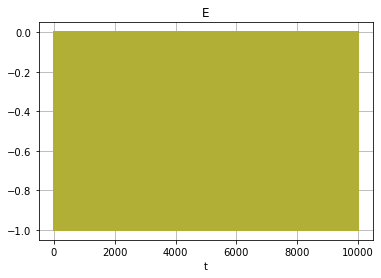

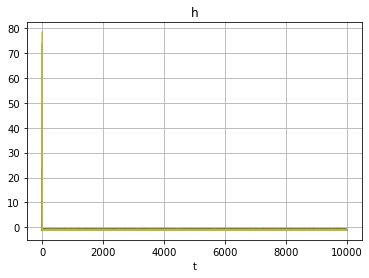

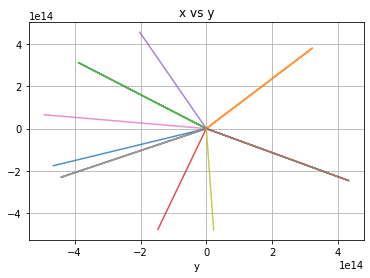

In [8]:
tfinal = 10000*year
mu = 1
h = 1*year
row_list = []
for file in list_csv: 
    inew = 0 
    filename= file.rsplit('/')[-1].rsplit('.')[0].rsplit('-')[0]
    data = pd.read_csv(file, header = 0 )
    x = [data['xh'][0], data['yh'][0], data['zh'][0]]
    y = [data['vxh'][0], data['vyh'][0], data['vz'][0]]
    #df = pd.DataFrame(columns = ['t', 'x', 'y', 'z', 'vx', 'vy', 'vz', 'E', 'h'])
    for time in range(0,tfinal, h) : 
        x , y = leapfrog(x,y,h,mu)
        E, hang = monitor(x,y)
        dict = {'t':time, 'x' : x[0],'y':x[1],'z':x[2],'vx':y[0],'vy':y[1],'vz':y[2],'E':E,'h':hang, 'id': filename}
        row_list.append(dict) 

df = pd.DataFrame(row_list)
plot_routine(df)